In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline
from ovejero import model_trainer, data_tools, bnn_inference

# Testing the Performance of Trained Models

__Author:__ Sebastian Wagner-Carena

__Created:__ 11/15/2019

__Last Run:__ 11/15/2019

__Goals:__ Inspect how the different bnn types and data augmentation strategies change the performance

## Diagonal Posterior - Normalizing Inputs

In [11]:
# First specify the config path
root_path = '/Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/'
config_path = root_path + 'configs/nn1.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)

def recursive_str_checker(cfg_dict):
    for key in cfg_dict:
        if isinstance(cfg_dict[key],str):
            cfg_dict[key] = cfg_dict[key].replace('/home/swagnercarena/ovejero/',root_path)
        if isinstance(cfg_dict[key],dict):
            recursive_str_checker(cfg_dict[key])
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
save_path = root_path + 'models/samps/nn1_val_samps'
bnn_infer.gen_samples(num_samples,save_path)

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn1.h5
Loading samples from /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn1_val_samps.npy


UnboundLocalError: local variable 'al_samp' referenced before assignment

In [4]:
bnn_infer.report_stats()

Parameter, Median Abs Error, Median Std
external_shear_g1 0.01118991651899667 0.024420617890312198
external_shear_g2 0.008845655588006818 0.02833897536394505
lens_mass_center_x 0.01028056906528271 0.031176123110218164
lens_mass_center_y 0.008055674715903648 0.02969049868745281
lens_mass_e1 0.021169947602430437 0.0412343294758421
lens_mass_e2 0.019967774637138606 0.051208967634876486
lens_mass_gamma 0.04541523151737481 0.07301178458501939
lens_mass_theta_E_log 0.00670963761813052 0.031242192135389812


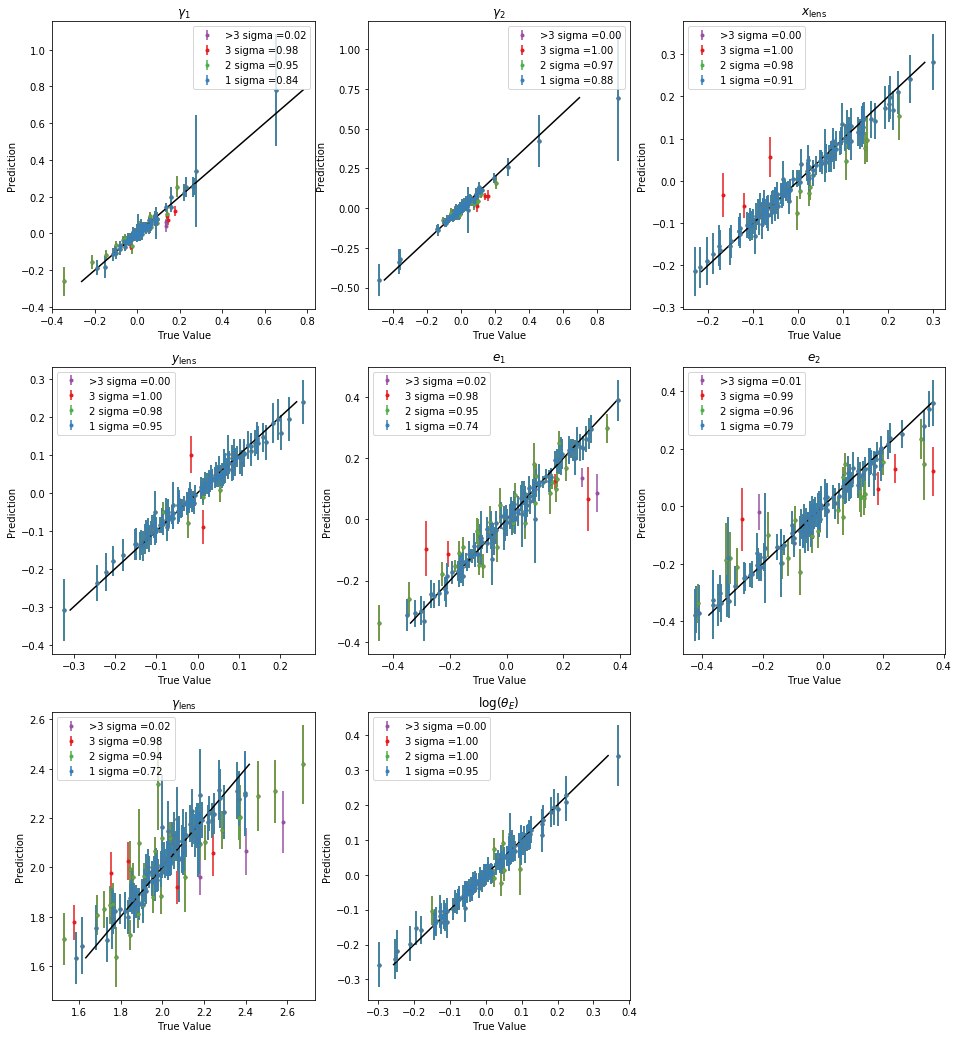

In [5]:
bnn_infer.gen_coverage_plots()

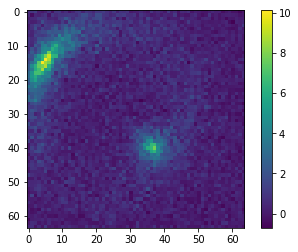

external_shear_g1 -0.044006664
external_shear_g2 -0.07587741
lens_mass_center_x -0.1295028
lens_mass_center_y 0.04662125
lens_mass_e1 -0.08801002
lens_mass_e2 -0.043361075
lens_mass_gamma 1.8719231
lens_mass_theta_E_log 0.11571761


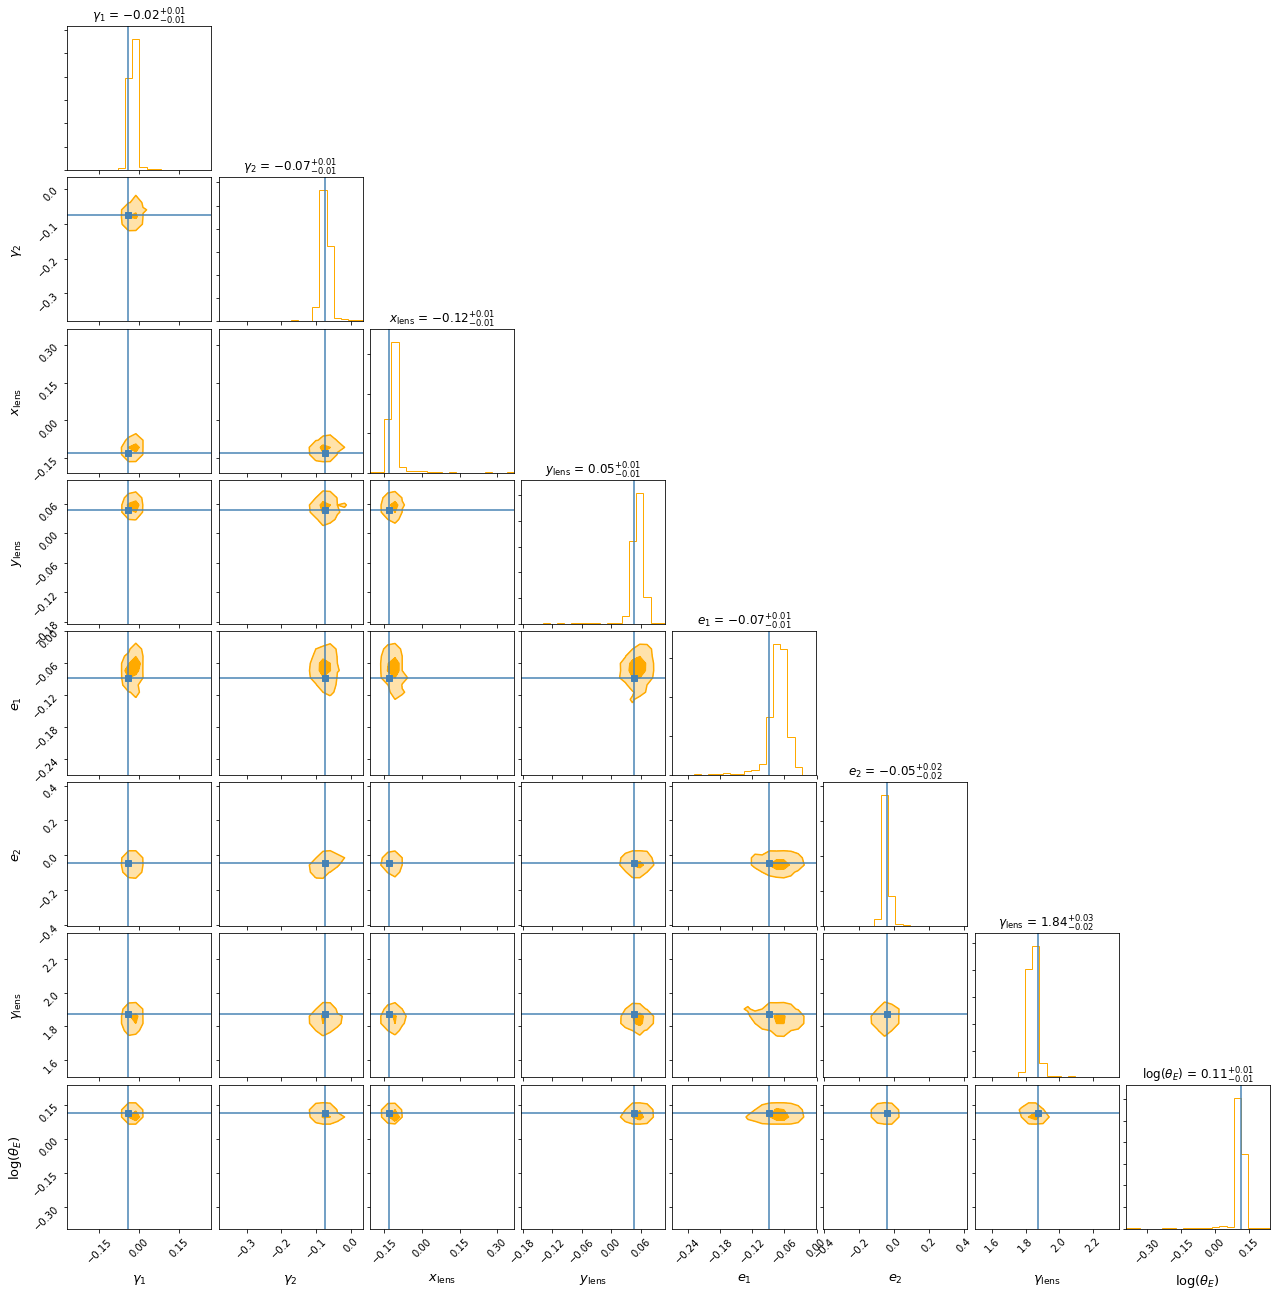

In [8]:
image_index = 20
bnn_infer.plot_posterior_contours(image_index)

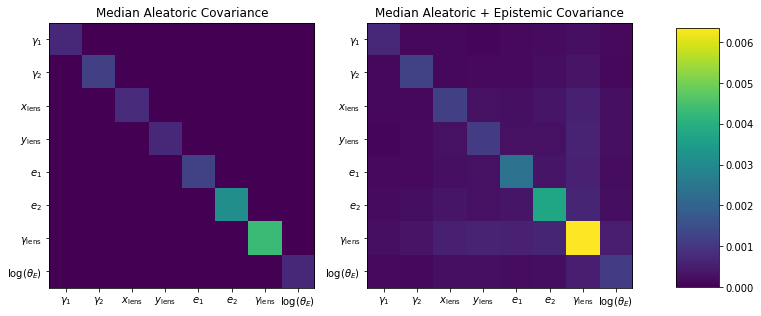

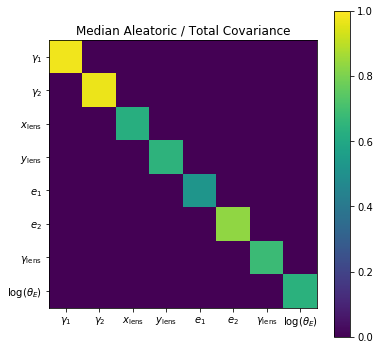

In [7]:
bnn_infer.comp_al_ep_unc()

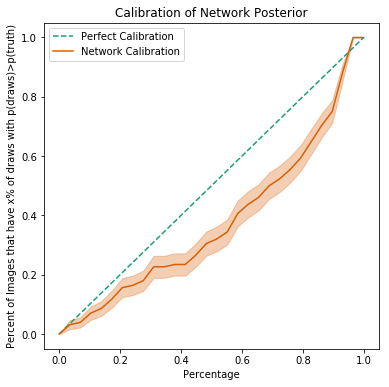

In [7]:
color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

## Full Posterior

In [ ]:
# First specify the config path
root_path = '/Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/'
config_path = root_path + 'configs/nn2.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
save_path = root_path + 'models/samps/nn2_val_samps'
bnn_infer.gen_samples(num_samples,save_path)

Is model built: True
Loaded weights /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/nn2.h5


  0%|          | 0/1000 [00:00<?, ?it/s]

No samples found. Saving samples to /Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/models/samps/nn2_val_samps


 63%|██████▎   | 631/1000 [08:19<04:06,  1.50it/s]

In [ ]:
bnn_infer.report_stats()

In [ ]:
bnn_infer.gen_coverage_plots()

In [ ]:
image_index = 20
bnn_infer.plot_posterior_contours(image_index)

## GM Posterior

In [ ]:
# First specify the config path
root_path = '/Users/sebwagner/Documents/Grad_School/Rotations/Phil/ovejero/'
config_path = root_path + 'configs/nn3.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
save_path = root_path + 'models/samps/nn3_val_samps'
bnn_infer.gen_samples(num_samples,save_path)

In [ ]:
bnn_infer.report_stats()

In [ ]:
bnn_infer.gen_coverage_plots()

In [ ]:
image_index = 20
bnn_infer.plot_posterior_contours(image_index)

## Combined Plot

In [ ]:
# First specify the config path
config_path = '/home/swagnercarena/ovejero/configs/nn1.json'

# Check that the config has what you need
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)

# The InferenceClass will do all the heavy lifting of preparing the model from the configuration file,
# initializing the validation dataset, and providing outputs correctly marginalized over the BNN uncertainties.
bnn_infer = bnn_inference.InferenceClass(cfg)

# Now we just have to ask the InferenceClass to spin up some samples from our BNN. The more samples, the more
# accurate our plots and metrics will be. The right value to use unfortunately requires a bit of trial and error.
# 100 is a good starting point though.
num_samples = 1000
save_path = root_path + 'models/samps/nn1_val_samps'
bnn_infer.gen_samples(num_samples,save_path)

color_map = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']
n_perc_points = 30
fig = bnn_infer.plot_calibration(color_map=color_map,n_perc_points=n_perc_points,show_plot=False)

# NN2
config_path = '/home/swagnercarena/ovejero/configs/nn2.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path = root_path + 'models/samps/nn2_val_samps'
bnn_infer.gen_samples(num_samples,save_path)
fig = bnn_infer.plot_calibration(color_map=color_map[1:],n_perc_points=n_perc_points,figure=fig,show_plot=False)

# NN3
config_path = '/home/swagnercarena/ovejero/configs/nn3.json'
cfg = model_trainer.load_config(config_path)
recursive_str_checker(cfg)
bnn_infer = bnn_inference.InferenceClass(cfg)
save_path = root_path + 'models/samps/nn3_val_samps'
bnn_infer.gen_samples(num_samples,save_path)
fig = bnn_infer.plot_calibration(color_map=color_map[2:],n_perc_points=n_perc_points,figure=fig,show_plot=True,
                                legend=['Perfect Calibration','Diagonal Calibration','Full Calibration',
                                       'GMM Calibration'])